In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import numpy as np


In [2]:
file_path = "../dataset/schizo_symptons_cleaned_MinMax.xlsx"  
df = pd.read_excel(file_path)
print(df.head())

     Age  Gender  Marital_Status   Fatigue   Slowing      Pain   Hygiene  \
0  0.325       0               2  0.668653  0.183580  0.397263  0.278464   
1  0.825       1               1  0.121694  0.044451  0.445757  0.504164   
2  0.300       0               1  0.629807  0.237542  0.502095  0.335441   
3  1.000       0               3  0.110802  0.569214  0.085281  0.339696   
4  0.650       0               3  0.861405  0.487827  0.673113  0.702957   

   Movement  Schizophrenia  
0  0.289548              0  
1  0.398257              3  
2  0.332596              0  
3  0.766339              3  
4  0.567585              1  


In [3]:
print(df.describe())


               Age       Gender  Marital_Status      Fatigue      Slowing  \
count  5000.000000  5000.000000     5000.000000  5000.000000  5000.000000   
mean      0.495835     0.498000        1.483000     0.504910     0.500735   
std       0.239447     0.500046        1.130472     0.243461     0.243069   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%       0.300000     0.000000        0.000000     0.299428     0.297777   
50%       0.500000     0.000000        1.000000     0.504910     0.500735   
75%       0.700000     1.000000        3.000000     0.709179     0.698237   
max       1.000000     1.000000        3.000000     1.000000     1.000000   

              Pain      Hygiene     Movement  Schizophrenia  
count  5000.000000  5000.000000  5000.000000    5000.000000  
mean      0.502095     0.502877     0.500111       0.766200  
std       0.242588     0.249666     0.246022       1.150218  
min       0.000000     0.000000     0.000000       0.00000

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5000 non-null   float64
 1   Gender          5000 non-null   int64  
 2   Marital_Status  5000 non-null   int64  
 3   Fatigue         5000 non-null   float64
 4   Slowing         5000 non-null   float64
 5   Pain            5000 non-null   float64
 6   Hygiene         5000 non-null   float64
 7   Movement        5000 non-null   float64
 8   Schizophrenia   5000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 351.7 KB
None


In [5]:
# Pisahkan fitur (X) dan label (Y)
df_X = df.drop(columns=['Schizophrenia'])  # semua fitur numerik
df_Y = df['Schizophrenia']  # target klasifikasi

In [6]:
# Konversi kembali menjadi DataFrame dengan kolom yang sesuai
column_label = df.drop(columns=['Schizophrenia']).columns  
df_X = pd.DataFrame(df_X, columns=column_label)

In [7]:
print(df_X.head())

     Age  Gender  Marital_Status   Fatigue   Slowing      Pain   Hygiene  \
0  0.325       0               2  0.668653  0.183580  0.397263  0.278464   
1  0.825       1               1  0.121694  0.044451  0.445757  0.504164   
2  0.300       0               1  0.629807  0.237542  0.502095  0.335441   
3  1.000       0               3  0.110802  0.569214  0.085281  0.339696   
4  0.650       0               3  0.861405  0.487827  0.673113  0.702957   

   Movement  
0  0.289548  
1  0.398257  
2  0.332596  
3  0.766339  
4  0.567585  


**contoh menentukan k**
* K ≈ √N
* K ≈ √5000 ≈ 70.7 → K = 70 (dibulatkan ke bawah atau atas)

In [8]:
k = 6
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(df_X, df_Y)
knn_test = model_knn.predict(df_X)

In [9]:
print("\nClassification Report for full dataset:")
print(classification_report(df_Y, knn_test))


Classification Report for full dataset:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3077
           1       0.95      0.67      0.79       953
           2       1.00      0.36      0.52        45
           3       0.93      0.68      0.79       912
           4       0.00      0.00      0.00        13

    accuracy                           0.86      5000
   macro avg       0.74      0.54      0.60      5000
weighted avg       0.87      0.86      0.85      5000



C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [10]:
# K-fold Cross Validation
seed = 7
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
knn_acc = model_selection.cross_val_score(model_knn, df_X, df_Y, cv=kfold, scoring=scoring)

print("Akurasi per fold:")
print(", ".join([f"{acc:.4f}" for acc in knn_acc]))
print("\nKinerja rata-rata: {:.4f}".format(knn_acc.mean()))
print("Standar deviasi: {:.4f}".format(knn_acc.std()))

Akurasi per fold:
0.8040, 0.8120, 0.7940, 0.8120, 0.8080, 0.8340, 0.8020, 0.8120, 0.8200, 0.8280

Kinerja rata-rata: 0.8126
Standar deviasi: 0.0114


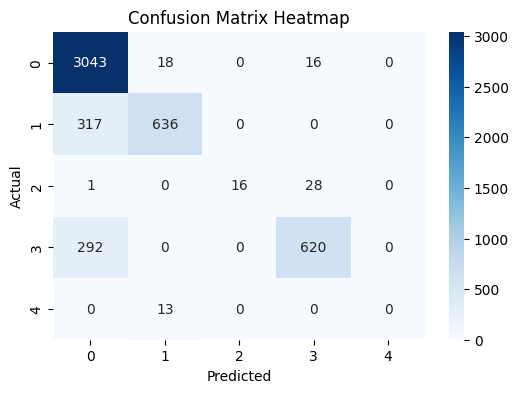

In [11]:
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(df_Y, knn_test)

# Heatmap confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()